In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-airports-and-airlines-datasets/routes.dat
/kaggle/input/world-airports-and-airlines-datasets/airports_mod.dat
/kaggle/input/world-airports-and-airlines-datasets/Final_airlines


I'm trying using dat files 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
route = df = pd.read_csv('/kaggle/input/world-airports-and-airlines-datasets/routes.dat')

In [4]:
final = pd.read_csv('/kaggle/input/world-airports-and-airlines-datasets/Final_airlines')

In [5]:
route.head()

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [15]:
route_clean = route.dropna()

In [16]:
route_clean 

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
186,2P,897,GES,6011,MNL,2397,Y,0,320
196,2P,897,MNL,2397,GES,6011,Y,0,320
1058,4M,3201,DFW,3670,EZE,3988,Y,0,777
1059,4M,3201,EZE,3988,DFW,3670,Y,0,777
1060,4M,3201,EZE,3988,JFK,3797,Y,0,777
...,...,...,...,...,...,...,...,...,...
67428,ZH,4611,ZHA,6357,PEK,3364,Y,0,737
67430,ZH,4611,ZUH,6355,CKG,3393,Y,0,737
67431,ZH,4611,ZUH,6355,CTU,3395,Y,0,319
67435,ZH,4611,ZUH,6355,PEK,3364,Y,0,737 320


In [32]:
%%sh

awk 'NR==4442' /kaggle/input/world-airports-and-airlines-datasets/airports_mod.dat

5881,Mata'aho Airport,Angaha, Niuafo'ou Island,Tonga,NFO,NFTO,-15.5708,-175.633,160,13,U,Pacific/Tongatapu


In [20]:
%%sh

awk 'NR==4442' /kaggle/input/world-airports-and-airlines-datasets/airports_mod.dat

5881,Mata'aho Airport,Angaha, Niuafo'ou Island,Tonga,NFO,NFTO,-15.5708,-175.633,160,13,U,Pacific/Tongatapu


In [35]:
%%sh

cat /kaggle/input/world-airports-and-airlines-datasets/routes.dat | wc -l

67663


In [22]:
route.columns

Index(['2B', '410', 'AER', '2965', 'KZN', '2990', 'Unnamed: 6', '0', 'CR2'], dtype='object')

In [6]:
final.head(10)

,1,Private flight,\N,-,N/A,Unnamed: 5,Unnamed: 6,Y
0,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
1,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
2,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
3,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N
4,6,223 Flight Unit State Airline,\N,NaN,CHD,CHKALOVSK-AVIA,Russia,N
5,7,224th Flight Unit,\N,NaN,TTF,CARGO UNIT,Russia,N
6,8,247 Jet Ltd,\N,NaN,TWF,CLOUD RUNNER,United Kingdom,N
7,9,3D Aviation,\N,NaN,SEC,SECUREX,United States,N
8,10,40-Mile Air,\N,Q5,MLA,MILE-AIR,United States,Y
9,11,4D Air,\N,NaN,QRT,QUARTET,Thailand,N


In [17]:
final_clean = final.dropna()

In [18]:
final_clean

,1,Private flight,\N,-,N/A,Unnamed: 5,Unnamed: 6,Y
1,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
8,10,40-Mile Air,\N,Q5,MLA,MILE-AIR,United States,Y
11,13,Ansett Australia,\N,AN,AAA,ANSETT,Australia,Y
13,15,Abelag Aviation,\N,W9,AAB,ABG,Belgium,N
19,21,Aigle Azur,\N,ZI,AAF,AIGLE AZUR,France,Y
...,...,...,...,...,...,...,...,...
6020,19676,Rainbow Air Polynesia,Rainbow Air POL,RX,RPO,Rainbow Air,United States,Y
6021,19677,Rainbow Air Euro,Rainbow Air EU,RU,RUE,Rainbow Air,United Kingdom,Y
6022,19678,Rainbow Air US,Rainbow Air US,RM,RNY,Rainbow Air,United States,Y
6024,19751,Dobrolet,Добролёт,QD,DOB,DOBROLET,Russia,Y


In [19]:
final_clean.describe()

,1
count,1004.000000
mean,3405.789841
std,3552.460338
min,3.000000
25%,1359.750000
50%,2840.000000
75%,4296.750000
max,19774.000000


In [23]:
final['1'].value_counts()

1
2        1
4036     1
4045     1
4044     1
4043     1
        ..
2017     1
2016     1
2015     1
2014     1
19845    1
Name: count, Length: 6047, dtype: int64

In [24]:
final['Private flight'].value_counts()

Private flight
National Airlines          5
Star Air                   5
Royal Air Force            5
University Air Squadron    4
Atlantic Airlines          4
                          ..
Dix Aviation               1
Dispatch Services          1
Discovery Airways          1
Discover Air               1
FTI Fluggesellschaft       1
Name: count, Length: 5958, dtype: int64

In [26]:
final['-'].value_counts()

-
1I    7
IJ    5
SX    4
BZ    4
SH    4
     ..
TE    1
LF    1
F7    1
BE    1
88    1
Name: count, Length: 1090, dtype: int64

In [27]:
final['Unnamed: 5'].value_counts()

Unnamed: 5
 Inc.            20
 S.A.            15
                 11
 S.A. de C.V.     5
\N                3
                 ..
CENTURY           1
VOE CRUISER       1
REGAL             1
CROWN AIRWAYS     1
FlyPortugal       1
Name: count, Length: 5215, dtype: int64

In [28]:
final['Unnamed: 6'].value_counts()

Unnamed: 6
United States          1080
Mexico                  439
United Kingdom          407
Canada                  318
Russia                  230
                       ... 
ARIZAIR                   1
APPALACHIAN               1
AZIMUT                    1
ATLANTIC NICARAGUA        1
Congo (Brazzaville)       1
Name: count, Length: 276, dtype: int64

In [29]:
final['Y'].value_counts()

Y
N    4886
Y    1160
n       1
Name: count, dtype: int64

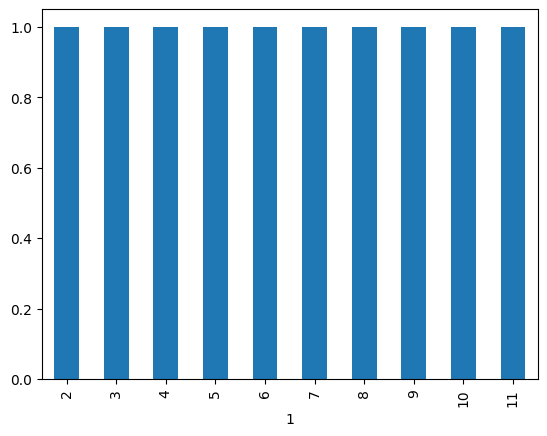

In [40]:
final['1'].head(10).value_counts().plot(kind='bar')
plt.show()

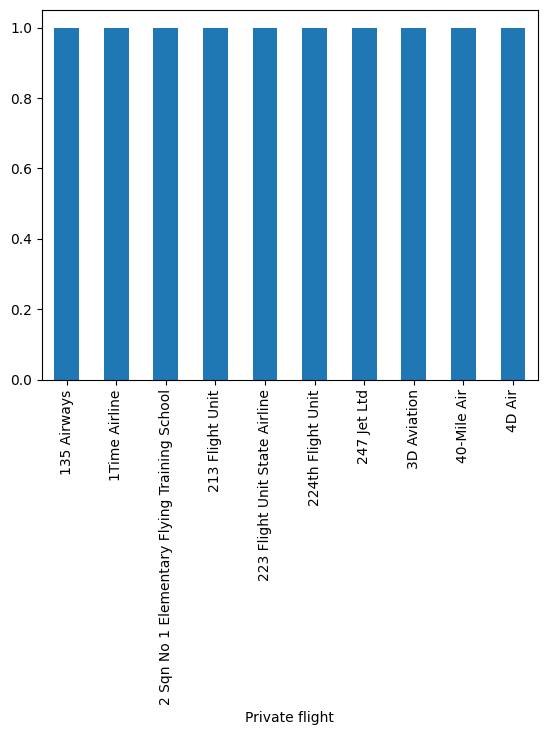

In [39]:
# Barchart for Type Of Private Flight

final['Private flight'].head(10).value_counts().plot(kind='bar')
plt.show()

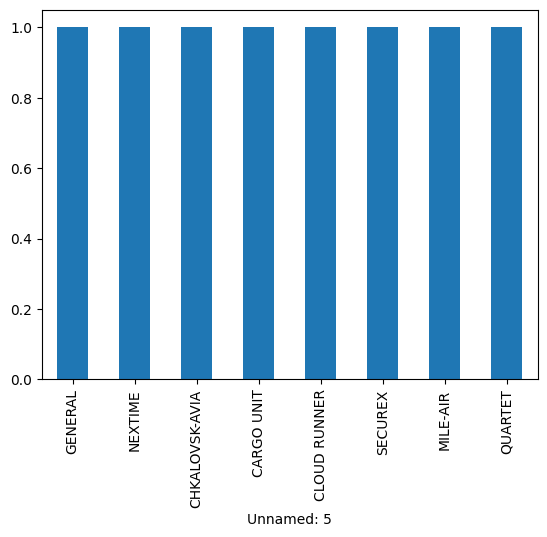

In [38]:
# Barchart for Type Of Airplanes

final['Unnamed: 5'].head(10).value_counts().plot(kind='bar')
plt.show()

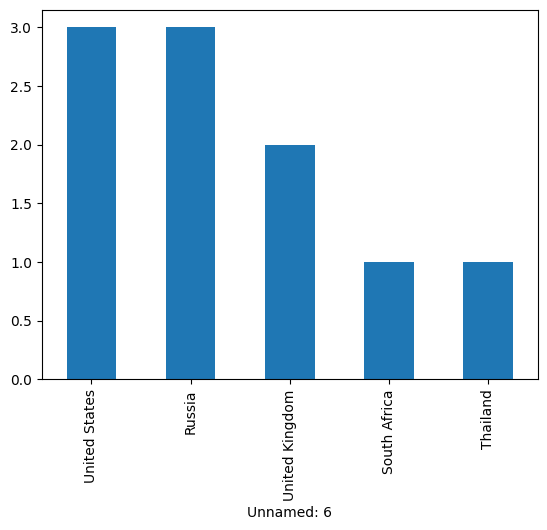

In [36]:
# Barchart for Country

final['Unnamed: 6'].head(10).value_counts().plot(kind='bar')
plt.show()

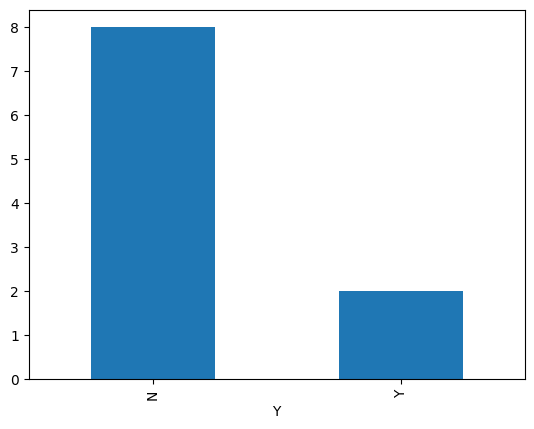

In [43]:
# Barchart for Country

final['Y'].head(10).value_counts().plot(kind='bar')
plt.show()

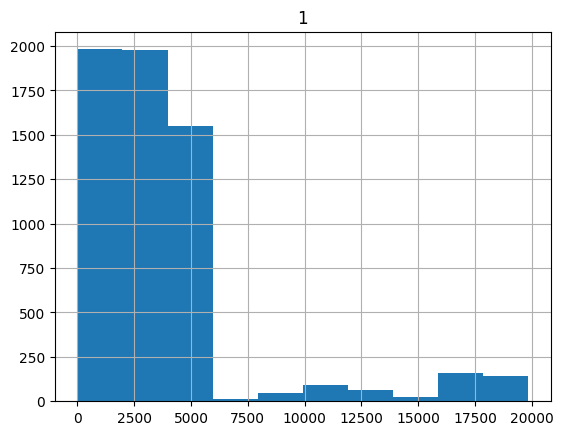

In [41]:
# histograms
final.hist()
plt.show()